In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import math
from sympy import Point,Line

In [3]:
data = np.array(pd.read_csv('~/DataSet3/1.csv'))

In [4]:
data1=data[:,1:4]
labels = data[:,-1]
labels

array([1., 1., 1., ..., 7., 7., 0.])

**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [5]:
scaler = StandardScaler()
scaler.fit(data1)
sample_transformed = scaler.transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow Implimentation with Root Mean Squared Standered Deviation**

In [6]:
RMSSTD={}
K = range(2,11)
for k in K :
    RMSSTD[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample_transformed)
    centers = kmeansModel.cluster_centers_
    sample_transformed1 = kmeansModel.fit_transform(sample_transformed)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample_transformed[labels==i],columns=["PC1","PC2","PC3"])
        print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        print("Cluster Mean= "+str(cluster_mean))
        
        for index,row in cluster_datapoints.iterrows():
            a=(row["PC1"]-cluster_mean["PC1"])**2
            b=(row["PC2"]-cluster_mean["PC2"])**2
            c=(row["PC3"]-cluster_mean["PC3"])**2
            err=math.sqrt(a+b+c)
            RMSSTD[k]=RMSSTD[k]+err
    #Calculate the mean error for entire dataset
    RMSSTD[k]=RMSSTD[k]/len(sample_transformed)
    print("RMSSTD = "+str(RMSSTD))

        PC1       PC2        PC3
0 -4.593277 -6.661798   4.498428
1  0.450944  0.684878  11.721827
2  4.806199 -1.390320  -3.615297
3  5.224500 -1.366467  -3.800082
4  4.781593 -2.058199  -3.632095
Cluster Mean= PC1    1.174178
PC2   -0.203553
PC3    1.249730
dtype: float64
        PC1        PC2       PC3
0 -5.995817  -7.353531  0.097194
1 -7.373750 -10.096608 -2.271409
2 -7.619810 -10.525959 -3.531304
3 -6.586359  -9.905785 -2.724971
4 -7.545992 -10.048902 -2.019430
Cluster Mean= PC1   -0.488906
PC2    0.084755
PC3   -0.520364
dtype: float64
RMSSTD = {2: 0.9428487325047938}
        PC1        PC2       PC3
0 -5.995817  -7.353531  0.097194
1 -7.373750 -10.096608 -2.271409
2 -7.619810 -10.525959 -3.531304
3 -6.586359  -9.905785 -2.724971
4 -7.545992 -10.048902 -2.019430
Cluster Mean= PC1   -0.405304
PC2   -0.146010
PC3   -0.561990
dtype: float64
        PC1       PC2        PC3
0  0.450944  0.684878  11.721827
1  5.224500 -1.366467  -3.800082
2  5.421348 -2.702226  -3.077742
3  4.60935

        PC1       PC2        PC3
0  0.450944  0.684878  11.721827
1  5.421348 -2.702226  -3.077742
2  6.676251 -2.201317  -4.018463
3  5.913467 -1.223350  -2.405797
4  6.331768 -0.984822  -0.457160
Cluster Mean= PC1    1.412043
PC2   -0.164454
PC3    1.328016
dtype: float64
        PC1       PC2       PC3
0  0.967669 -1.461878 -6.219080
1 -0.853172 -1.962788 -6.067893
2 -0.533294 -1.986641 -6.672643
3 -0.680930 -2.034347 -5.446345
4 -0.213417 -2.296728 -4.505623
Cluster Mean= PC1   -0.048473
PC2    0.125959
PC3   -0.875196
dtype: float64
        PC1       PC2       PC3
0 -5.036184 -2.463698 -0.927520
1 -3.781280 -3.083872 -3.228929
2 -2.575589 -3.823310 -4.152852
3 -2.378741 -4.562748 -3.598498
4 -1.763592 -5.755390 -2.674575
Cluster Mean= PC1   -0.378551
PC2   -2.047970
PC3   -0.091655
dtype: float64
        PC1       PC2       PC3
0 -2.181893  1.090376  4.044866
1 -2.034257 -0.603176  4.229651
2 -0.582506 -0.126119  1.340291
3 -0.680930 -0.173825  1.021117
4 -0.213417 -1.271056  2.58

In [7]:
SSE_array=[]
slope=[]
for key,value in RMSSTD.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[0.9428487325047938, 0.8521817886223415, 0.738548114613601, 0.6440431232008125, 0.5813230053152135, 0.5648168310826799, 0.5599871260543572, 0.5362581555705425, 0.5255079922928226]


[[2, -0.09066694388245233],
 [3, -0.11363367400874047],
 [4, -0.09450499141278856],
 [5, -0.06272011788559895],
 [6, -0.016506174232533644],
 [7, -0.004829705028322695],
 [8, -0.023728970483814726],
 [9, -0.010750163277719826]]

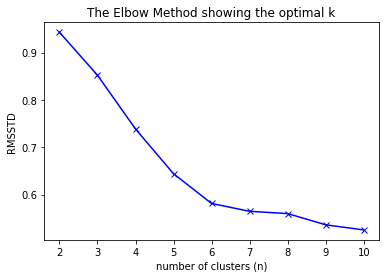

In [8]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('number of clusters (n)')
plt.ylabel('RMSSTD')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 1
Optimal Number of Clusters = 6


In [10]:
distances=[]
for i in range(0,9):
    p1=Point(2,SSE_array[0])
    p2=Point(10,SSE_array[8])
    l1 = Line(p1,p2)
    p=Point(i+2,SSE_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 6
